# Gaussian process action optimization

This is basic structure of code itself using toy model. Throughout the M\"uller Brown example, we are going to learn

1. Muller Brown GPAO

## Muller Brown GPAO



Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    224    238    238   2.3629   0.4154
converg :    226    243    243   2.3621   0.1836
jac_max > tol(0.01); Run without gradient
converg :    227    247    247   2.3618   0.2556


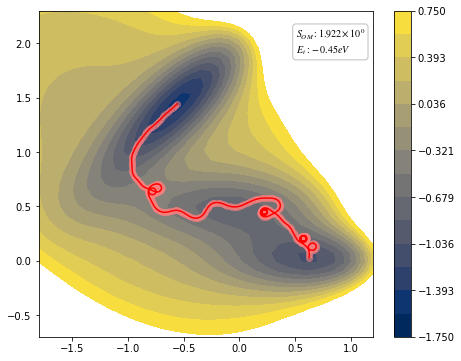

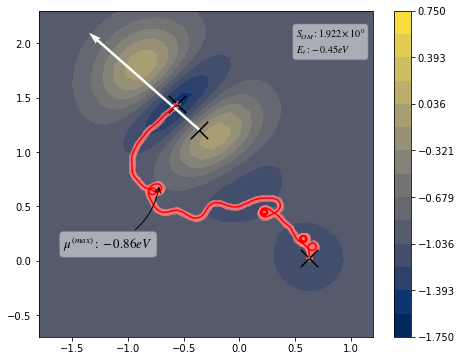

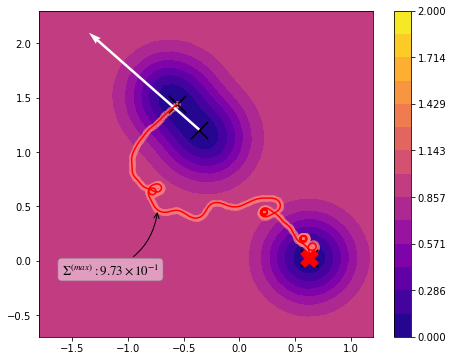

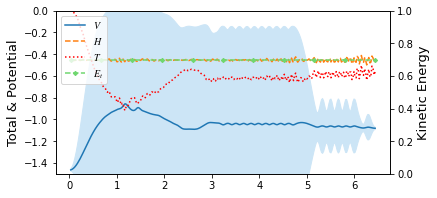

In [1]:
import numpy as np
from taps.paths import Paths
from taps.pathfinder import DAO
from taps.model import MullerBrown
from taps.coords import Coords
from taps.visualize import view
from taps.db.data import ImageData
from taps.projectors import Sine

N = 300
Nk = N - 210

x = np.linspace(-0.55822365, 0.6234994, N)
y = np.linspace(1.44172582, 0.02803776, N)

coords = Coords(coords=np.array([x, y]))
model = MullerBrown()
from taps.ml.gaussian import Gaussian
hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1, 1), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}


model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
imgdata = ImageData("mullerbrown.db")



search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}


prj = Sine(N=N, Nk=Nk, init=coords[:, 0].copy(), fin=coords[:, -1].copy())

finder = DAO(Et=-0.45, muE=1., tol=1e-2, gam=1.,
             action_name = ['Onsager Machlup', "Energy conservation"],
             prj_search=True, sin_search=False,
             search_kwargs=search_kwargs, 
             prj=prj)

paths = Paths(coords=coords, model=model, imgdata=imgdata, finder=finder)

paths.coords.epoch=6
paths.add_data(index=[0, 50, -1])
paths.search()

view(paths, viewer='MullerBrown', gaussian=True)

In [2]:
most_uncertain_idx = np.argmax(paths.get_covariance())
print(most_uncertain_idx)
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

125
Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    419    457    457   3.3720   0.2974
converg :    420    462    462   3.3714   0.1444
jac_max > tol(0.01); Run without gradient
converg :    421    467    467   3.3712   0.3877


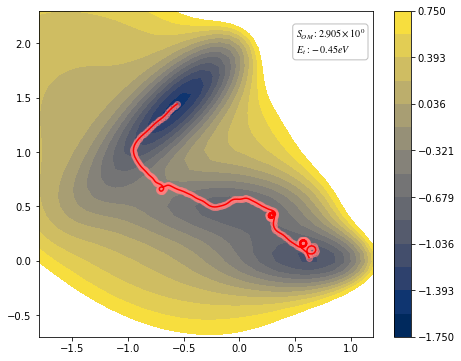

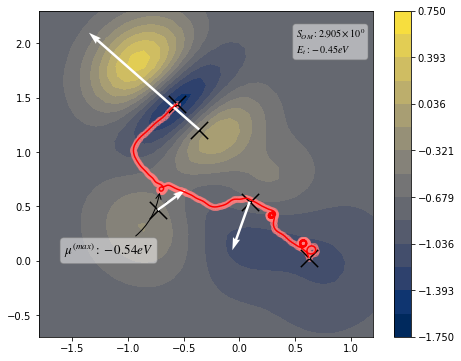

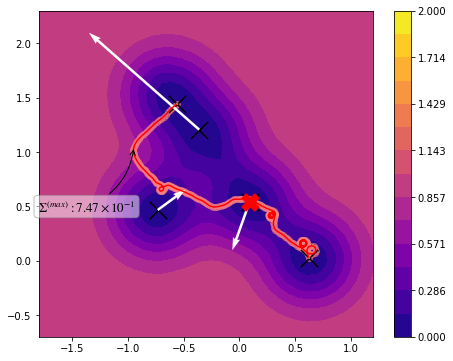

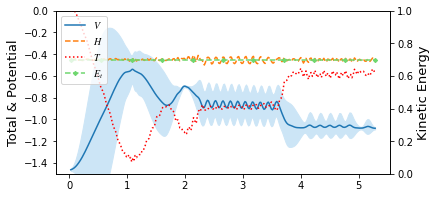

In [7]:
most_uncertain_idx = np.argmax(paths.get_covariance())
print(most_uncertain_idx)
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

22
Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    470    520    520   3.5121   0.3034
converg :    471    525    525   3.5115   0.1248
jac_max > tol(0.01); Run without gradient
converg :    472    530    530   3.5113   0.4350


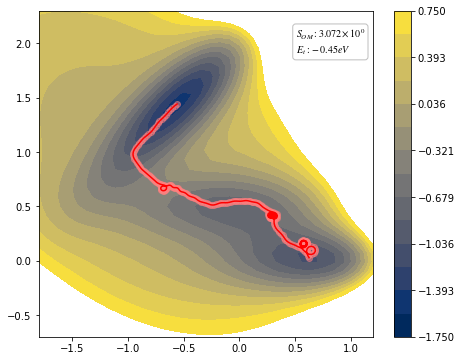

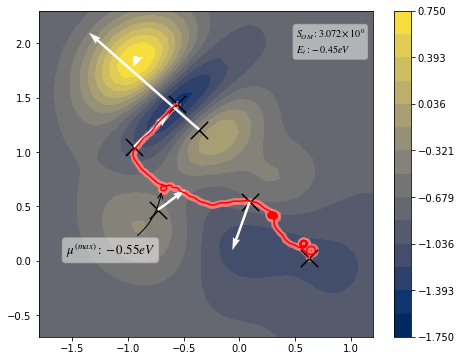

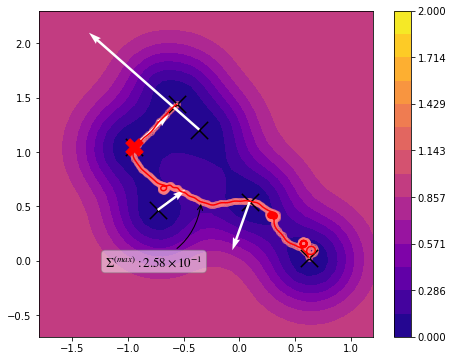

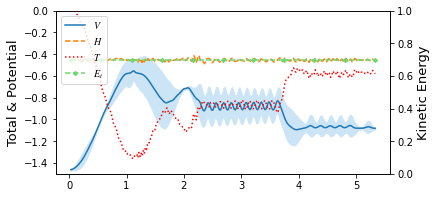

In [8]:
most_uncertain_idx = np.argmax(paths.get_covariance())
print(most_uncertain_idx)
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

103
Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    507    570    570   4.0368   0.2894
converg :    508    574    574   4.0363   0.3791
jac_max > tol(0.01); Run without gradient
converg :    509    578    578   4.0360   0.1532


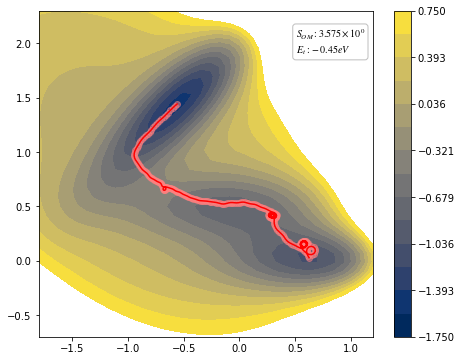

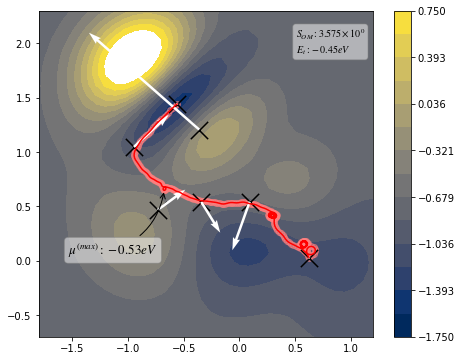

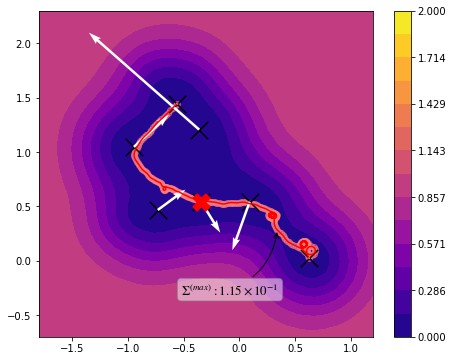

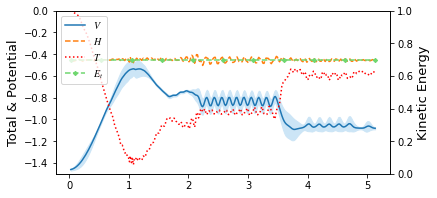

In [9]:
most_uncertain_idx = np.argmax(paths.get_covariance())
print(most_uncertain_idx)
paths.add_data(index=[most_uncertain_idx])
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    345    358    358   2.9363   0.6397
converg :    347    363    363   2.9345   0.1822
jac_max > tol(0.01); Run without gradient
converg :    348    367    367   2.9341   0.3690


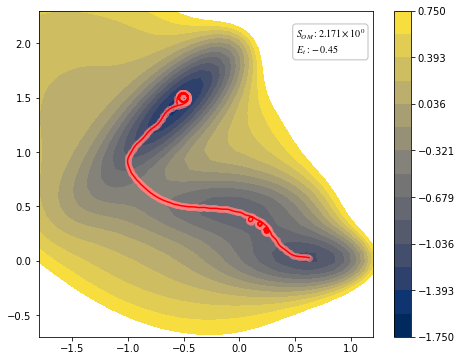

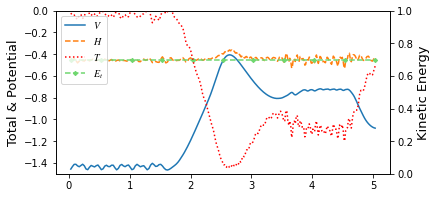

In [4]:
view(paths, viewer="MullerBrown")

# Iteration reduced from 1100 to

Only used the 30% of the components. 

# Database construction

In [5]:
from taps.db.data import ImageData
imgdata = ImageData("mullerbrown.db")

In [6]:
imgdata.add_data(paths, coords=paths.coords[..., [0, -1]])

{'image': [1, 2]}

In [7]:
imgdata.read_all()["image"][0], imgdata.read_all()["image"][1]

((array([-0.55822365,  1.44172582]),
  None,
  'Finished',
  1629603563.4727376,
  -1.4669951720995384,
  None,
  array([ 5.43788282e-08, -2.06867418e-07]),
  1629603563.4754255,
  None,
  None),
 (array([0.6234994 , 0.02803776]),
  None,
  'Finished',
  1629603563.475453,
  -1.0816672411685238,
  None,
  array([-2.50191479e-08,  3.64354996e-08]),
  1629603563.477985,
  None,
  None))

# Gaussian Potential

In [8]:
from taps.ml.gaussian import Gaussian
hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1, 1), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}

paths.imgdata = imgdata
model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
paths.model = model
paths.add_data(index=[0, -1])

{'image': [1, 2]}

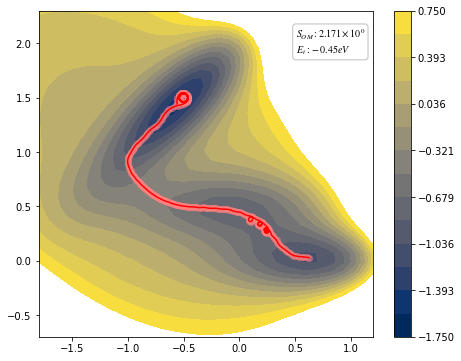

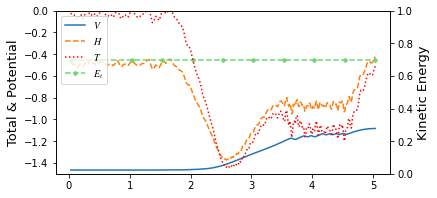

In [9]:
view(paths, viewer="MullerBrown", gaussian=True)

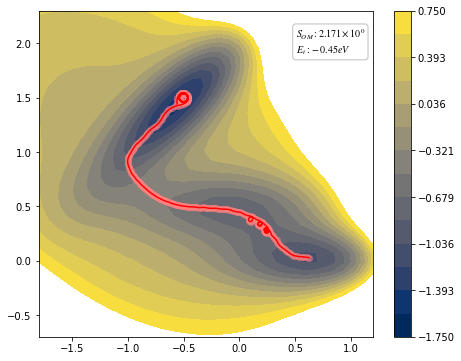

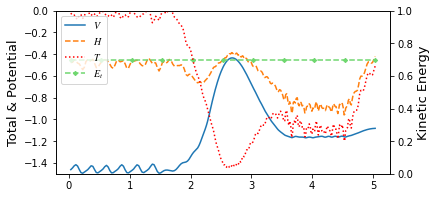

In [12]:
paths.add_data(index=[50, 150])
view(paths, viewer="MullerBrown")

# Pathway optimization perfomed

We will going to use direct action optimization. There is some trivial case around it. 

In [39]:
from taps.pathfinder import DAO

search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}

#prj = Sine(N=N, Nk=N-2, init=paths.coords[..., 0].copy(), fin=paths.coords[..., -1].copy())

finder = DAO(Et=-0.45, muE=1., tol=5e-2, gam=1.,
             action_name = ['Onsager Machlup', "Energy conservation"],
           #  prj_search=True, sin_search=False,
             search_kwargs=search_kwargs)


#finder = GPAO(real_finder=finder, label= directory + "gpao_1/1", phases=["auto et"])
paths.finder = finder
paths.coords.epoch=6
paths.search()

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    393    412    412   2.3580   0.2821
converg :    394    417    417   2.3578   0.3512
jac_max > tol(0.05); Run without gradient
converg :    395    422    422   2.3576   0.2191


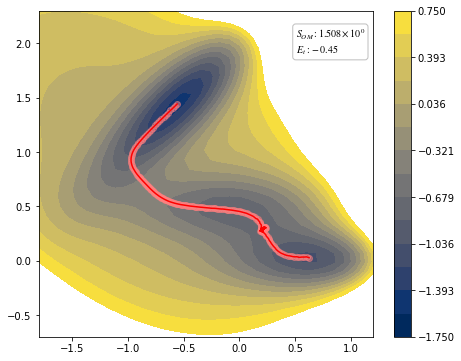

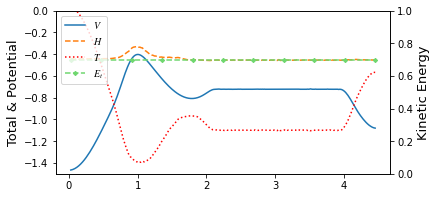

In [40]:
view(paths, viewer='MullerBrown')

In [ ]:
import numpy as np
from ase.pathway.paths import Paths
from ase.pathway.model import MullerBrown
from ase.pathway.projector import Mask
from ase.pathway.pathfinder import ADMD
from ase.pathway.gaussian import Gaussian, GaussianSearch
from ase.pathway.plotter import MullerBrownPlotter
P = 300

x = np.linspace(-0.55822365, 0.6234994, P)
y = np.linspace(1.44172582, 0.02803776, P)
p = np.array([[x], [y]])

hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1, 1), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}
#Et='average'
#Et=-108.16672412
Et=-46.69951721 / 100
muE=1e-2
#label='/group1/schinavro/ThesisWork/Image2/auto_svg/data'
label='/group/schinavro/MullerBrown/test1/mb'
#dt = 1 / P 
dt = 0.01
Et_opt_tol = 0.05
#dt = 0.002
maxiter=3000
gam= 0.3
#action_name=['classic', 'Energy conservation']
#action_name=['Onsager Machulup']
action_name=['Onsager Machulup', 'Energy conservation']

model = MullerBrown()
#model = Gaussian(real_model=model, hyperparameters=hyperparameters, hyperparameters_bounds=hyperparameters_bounds, mean_type='zero')
finder = ADMD(action_name=action_name, Et=Et, muE=muE, Et_type='manual', maxiter=maxiter, gam=gam)
#finder = GaussianSearch(real_finder=finder, phases=['auto et'], Et_opt_tol=Et_opt_tol)
auto_paths = Paths('H', p,label=label, database=label,
              model=model,
              finder=finder, 
              prj=Mask(reference=np.array([0, 0, 0]), dt=dt),
              plotter=MullerBrownPlotter()
              )
#auto_paths.finder._pbs='fifi'



In [6]:
for i in range(4, 80, 5):
    print(i)

4
9
14
19
24
29
34
39
44
49
54
59
64
69
74
79


In [2]:
auto_paths.fluctuate(temperature=0.02)

In [3]:
auto_paths.search()

Action name  :  ['Onsager Machulup', 'Energy conservation']
Target energy:  -0.4669951721
Target type  :  manual
muE          :  0.01
         Current function value: 10731806.112699
         Iterations: 41
         Function evaluations: 133
         Gradient evaluations: 121
Desired error not necessarily achieved due to precision loss.
         Current function value: 3.054333
         Iterations: 872
         Function evaluations: 993
         Gradient evaluations: 981
Desired error not necessarily achieved due to precision loss.
         Current function value: 2.963323
         Iterations: 66
         Function evaluations: 118
         Gradient evaluations: 106
Desired error not necessarily achieved due to precision loss.
Optimization terminated successfully.
         Current function value: 2.962730
         Iterations: 1
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.

Gradient Error above tolerence! 
Emergency mode; Run wit

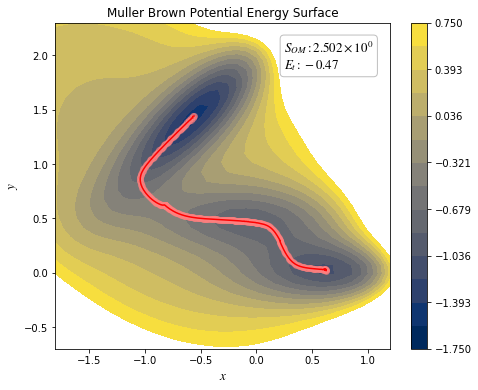

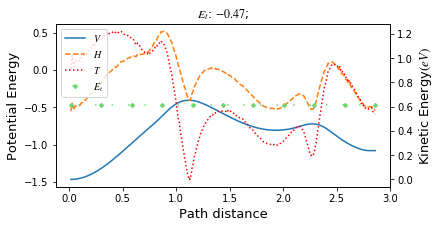

In [4]:
auto_paths.plot()

In [76]:
#_ = auto_paths.add_data(index=[0, -1])

In [2]:
#auto_paths.use_grad=False
while True:
    auto_paths.finder.search(auto_paths)
    if auto_paths.finder._res['nit'] < 3:
        break

Action name  :  ['Onsager Machulup', 'Energy conservation']
Target energy:  -0.4669951721
Target type  :  manual
muE          :  0.01
         Current function value: 2.969543
         Iterations: 399
         Function evaluations: 523
         Gradient evaluations: 511
Desired error not necessarily achieved due to precision loss.
Action name  :  ['Onsager Machulup', 'Energy conservation']
Target energy:  -0.4669951721
Target type  :  manual
muE          :  0.01
         Current function value: 2.966797
         Iterations: 11
         Function evaluations: 93
         Gradient evaluations: 81
Desired error not necessarily achieved due to precision loss.
Action name  :  ['Onsager Machulup', 'Energy conservation']
Target energy:  -0.4669951721
Target type  :  manual
muE          :  0.01
Optimization terminated successfully.
         Current function value: 2.966677
         Iterations: 1
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successful

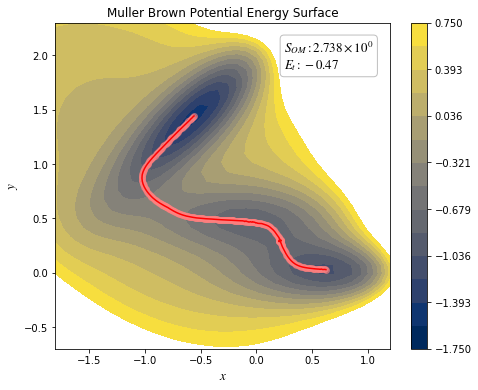

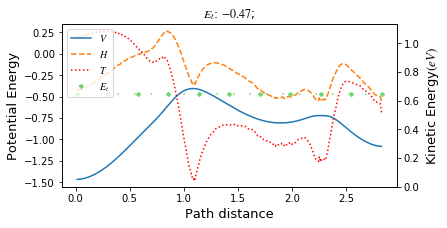

In [3]:
auto_paths.plot()

In [27]:
auto_paths.finder.use_grad=True
auto_paths.finder.check_grad(auto_paths, epsilon=1e-8)

10264147487.063562


In [12]:
auto_paths.model.check_grad(auto_paths, epsilon=1e-8)

3.092468348168216e-05


In [33]:
auto_paths.real_finder.use_grad=False
auto_paths.real_finder.search(auto_paths)

AttributeError: Key called `real_finder` not exist

In [4]:
auto_paths.get_velocity().shape

(2, 1, 299)